In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import json
from helpers import *
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [18]:
speakers = pd.read_parquet('data/speaker_attributes.parquet')

In [19]:
speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,Q23,George Washington,"[Q698073, Q697949]",item,[Q682443]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Q31],[Q6581097],1380367296,None,None,"[Q36180, Q40348, Q182436, Q1265807, Q205375, Q...",None,None,Q1868,Paul Otlet,None,item,None
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[Q30],[Q6581097],1395142029,None,None,"[Q82955, Q15982858, Q18814623, Q1028181, Q1408...",[Q29468],None,Q207,George W. Bush,"[Q327959, Q464075, Q3586276, Q4450587]",item,"[Q329646, Q682443, Q33203]"
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Q29],[Q6581097],1391704596,None,None,[Q1028181],None,None,Q297,Diego Velázquez,None,item,None


In [20]:
ENTREPRENEUR_QID = 'Q131524'
ARTIST_QID = 'Q483501'
artist_speakers = speakers[speakers.occupation.apply(lambda g: ARTIST_QID in g if g is not None else False)]
entrepreneur_speakers = speakers[speakers.occupation.apply(lambda g: ENTREPRENEUR_QID in g if g is not None else False)]

In [21]:
# extracting count of significant quotes for all the speakers in quotebank
with open('data/signi-quote-count-combined_1636253317430.json') as f:
    signi_quote_count_dict = json.load(f)

In [22]:
len(signi_quote_count_dict)

624492

In [23]:
signi_quote_count_df = pd.Series(signi_quote_count_dict, name='signi_quote_count')

In [24]:
signi_entrepreneur_speakers = entrepreneur_speakers.merge(signi_quote_count_df, left_on='id', right_index=True, how='inner')
signi_entrepreneur_speakers = signi_entrepreneur_speakers.sort_values(by=['signi_quote_count'], ascending=False).iloc[:100]

In [25]:
signi_artist_speakers = artist_speakers.merge(signi_quote_count_df, left_on='id', right_index=True, how='inner')
signi_artist_speakers = signi_artist_speakers.sort_values(by=['signi_quote_count'], ascending=False).iloc[:100]

In [26]:
signi_entrepreneur_speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion,signi_quote_count
2267061,"[Donald John Trump, Donald J. Trump, Trump, Th...",[+1946-06-14T00:00:00Z],[Q30],[Q6581097],1395141850,None,None,"[Q911554, Q557880, Q3427922, Q15980158, Q13152...","[Q29468, Q1897793, Q29552, Q29468, Q29468]",[Q787674],Q22686,Donald Trump,"[Q699872, Q22923830, Q38051523]",item,[Q178169],201293
7938171,"[Elon Reeve Musk, Elon R. Musk, Elon R Musk]",[+1971-06-28T00:00:00Z],"[Q258, Q16, Q30]",[Q6581097],1395054202,None,None,"[Q15895020, Q205375, Q5482740, Q81096, Q131524...",None,None,Q317521,Elon Musk,None,item,[Q288928],21644
4560262,[Malcolm Bligh Turnbull],[+1954-10-24T00:00:00Z],[Q408],[Q6581097],1388042865,None,None,"[Q1930187, Q82955, Q131524, Q40348, Q2883465]",[Q241149],None,Q927550,Malcolm Turnbull,None,item,[Q1841],17720
4529756,"[Mark Elliott Zuckerberg, Zuck, Zuckerberg, Ma...",[+1984-05-14T00:00:00Z],[Q30],[Q6581097],1391311625,[Q7325],None,"[Q5482740, Q131524, Q82594, Q15472169, Q484876]",None,None,Q36215,Mark Zuckerberg,None,item,"[Q7066, Q9268]",16025
1142938,"[Kim Kardashian West, KiKi, Keeks, Kim K, Kimb...",[+1980-10-21T00:00:00Z],[Q30],[Q6581072],1395690668,"[Q2325516, Q1058496, Q1344183, Q1075293, Q3476...",None,"[Q3501317, Q512314, Q4610556, Q8246794, Q13152...",[Q29552],None,Q186304,Kim Kardashian,None,item,[Q5043],10875


In [27]:
signi_artist_speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion,signi_quote_count
4529456,"[Kanye Omari West, Yeezy, Ye, Yeezus, The Fly ...",[+1977-06-08T00:00:00Z],[Q30],[Q6581097],1393795449,[Q49085],None,"[Q177220, Q2526255, Q8246794, Q2252262, Q43845...",[Q327591],[Q11415564],Q15935,Kanye West,None,item,[Q106039],7131
2514470,[Stephen Miller],[+1951-10-12T00:00:00Z],[Q30],[Q6581097],1382051740,None,None,"[Q1028181, Q483501]",None,None,Q11894443,Steve Miller,None,item,None,4378
4536293,"[Onika Maraj, Onika Tanya Maraj, Onika Tanya M...",[+1982-12-08T00:00:00Z],"[Q754, Q30]",[Q6581072],1395776598,"[Q49085, Q6025447]",None,"[Q36834, Q33999, Q177220, Q2405480, Q131524, Q...",None,None,Q162202,Nicki Minaj,None,item,[Q5043],4150
5942884,[Joshua Smith],[+1976-01-01T00:00:00Z],[Q30],[Q6581097],1395434231,None,None,"[Q1028181, Q483501, Q644687]",None,None,Q15454606,Josh Smith,None,item,None,2490
4811454,None,[+1972-01-01T00:00:00Z],[Q30],[Q6581097],1353759363,None,None,"[Q266569, Q483501]",None,None,Q15459993,Patrick Smith,None,item,None,1732


In [10]:
len(signi_entrepreneur_speakers.id.to_list())

100

In [11]:
len(signi_artist_speakers.id.to_list())

100

In [39]:
# retrieves the quotes for the significant top hundred speakers
from functools import partial
years = [2015, 2016, 2017, 2018, 2019, 2020]
speaker_qids = signi_entrepreneur_speakers.id.to_list()
output_list = []

for year in years:
    path_to_input = PATTERN_INPUT.format(year)
    
    # Process quote file
    output_name = process_compressed_json_file(path_to_input, 'data/entrepreneur-speaker-quotes', year, partial(check_if_speaker_quote, speakers=speaker_qids))
    
    output_entrepreneur_list.append(output_name)

print('\n\nOutput file names:')
for file_name in output_list:
    print(file_name)

Processing year 2019: 3397it [17:09,  3.30it/s]



File data/quotebank/quotes-2019.json.bz2 processed in 1029.7s



Processing year 2020: 793it [04:01,  3.28it/s]


File data/quotebank/quotes-2020.json.bz2 processed in 241.6s



Output file names:
data/entrepreneur-speaker-quotes-2019_1639068384882.json
data/entrepreneur-speaker-quotes-2020_1639068626708.json


In [ ]:
# retrieves the quotes for the significant top hundred speakers
from functools import partial
years = [2015, 2016, 2017, 2018, 2019, 2020]
speaker_qids = signi_artist_speakers.id.to_list()
output_list = []

for year in years:
    path_to_input = PATTERN_INPUT.format(year)
    
    # Process quote file
    output_name = process_compressed_json_file(path_to_input, 'data/entrepreneur-speaker-quotes', year, partial(check_if_speaker_quote, speakers=speaker_qids))
    
    output_artist_list.append(output_name)

print('\n\nOutput file names:')
for file_name in output_list:
    print(file_name)

In [3]:
output_entrepreneur_list = ['data/entrepreneur-speaker-quotes-2015_1639058393619.json', 'data/entrepreneur-speaker-quotes-2016_1639059086240.json', 'data/entrepreneur-speaker-quotes-2017_1639060611970.json', 'data/entrepreneur-speaker-quotes-2018_1639061980207.json', 'data/entrepreneur-speaker-quotes-2019_1639068384882.json', 'data/entrepreneur-speaker-quotes-2020_1639068626708.json']
print(output_entrepreneur_list)

['data/entrepreneur-speaker-quotes-2015_1639058393619.json', 'data/entrepreneur-speaker-quotes-2016_1639059086240.json', 'data/entrepreneur-speaker-quotes-2017_1639060611970.json', 'data/entrepreneur-speaker-quotes-2018_1639061980207.json', 'data/entrepreneur-speaker-quotes-2019_1639068384882.json', 'data/entrepreneur-speaker-quotes-2020_1639068626708.json']


In [4]:
output_artist_list = ['data/artist-speaker-quotes-2015_1639415942261.json', 'data/artist-speaker-quotes-2016_1639416599406.json', 'data/artist-speaker-quotes-2017_1639418039284.json', 'data/artist-speaker-quotes-2018_1639419423996.json', 'data/artist-speaker-quotes-2019_1639420451907.json', 'data/artist-speaker-quotes-2020_1639420690642.json']
print(output_artist_list)

['data/artist-speaker-quotes-2015_1639415942261.json', 'data/artist-speaker-quotes-2016_1639416599406.json', 'data/artist-speaker-quotes-2017_1639418039284.json', 'data/artist-speaker-quotes-2018_1639419423996.json', 'data/artist-speaker-quotes-2019_1639420451907.json', 'data/artist-speaker-quotes-2020_1639420690642.json']


In [5]:
entrepreneur_combined = combine_quotes_files(output_entrepreneur_list)

In [6]:
artist_combined = combine_quotes_files(output_artist_list)

In [7]:
len(entrepreneur_combined)

100

In [8]:
entrepreneur_quotes, filtered_quotes = filter_quotes(entrepreneur_combined)

In [9]:
filtered_quotes[:5]

[{'quotation': 'total and complete shutdown (http://www.marketwatch.com/story/trump-calls-for-complete-shutdown-of-muslims-entering-us-2015-12-07)',
  'proba': '0.8537'},
 {'quotation': 'The latest book on Hillary -- Wow, a really tough one! http://www.amazon.com/dp/151070678X\xa0 @RogerJStoneJr.',
  'proba': '0.8819'},
 {'quotation': "become president of the US ”.Net anyahu had on Wednesday confirmed he would meet the frontrunner for the Republican presidential nomination to succeed Barack Obama in the White House despite an international outcry... Recent related news World' Trump cancels Israel visit after uproar over his comments GOP presidential front-runner Donald Trump canceled plans Thursday to visit Israel, a trip for which even Prime Minister Benjamin Netanyahu -- widely seen as an... * By The Canadian Press * WASHINGTON -- The Associated Press has learned that Republican presidential candidate Donald Trump plans to visit the majority-Muslim... CJME 2 days ago-World You Might 

In [11]:
artist_quotes, filtered_quotes = filter_quotes(artist_combined)

In [12]:
filtered_quotes[:5]

[{'quotation': "In a corridor system, reserves in the banking system are scarce, and the Fed funds rate is set by adjusting the supply of reserves through open market operations to balance demand and supply at the FOMC's target range. In contrast, in a floor system, reserves are abundant, so that the interest rate the Fed pays on excess reserves, or IOER, is the primary tool used to control the federal funds rate. As Fed is trimming its balance sheet, the reserve is prone to be significantly lower than the level years ago. Some have raised that a return to channel system might be considered. Powell might comment on this area but we expect the Fed should maintain the current system for some time. Currently, how much the Fed would reduce its balance sheet (point 1) would also affect whether and when to adjust the system. Powell is unlikely offer more indications on the future rate hike path than what had been discussed in the June and August meetings. The Fed is set to raise the policy r

In [13]:
entrepreneur_quotes_concat = concatenate_quotes(entrepreneur_quotes)
artist_quotes_concat = concatenate_quotes(artist_quotes)

In [30]:
write_json_to_file('data/entrepreneur_quotes_concated', entrepreneur_quotes_concat)
write_json_to_file('data/artist_quotes_concated', artist_quotes_concat)

'data/artist_quotes_concated_1639489270176.json'

In [14]:
entrepreneur_quotes_df = pd.Series(entrepreneur_quotes_concat, name='quotations')
artist_quotes_df = pd.Series(artist_quotes_concat, name='quotations')

In [15]:
entrepreneur_quotes_df.head()

Q22686      Under what pretext did Israel's survival beco...
Q439729     Hurricane Irma is a major and life-threatenin...
Q11702      At the outset of these talks, the Obama admin...
Q887766     HBO is fortunate to have a lot of talented gu...
Q5284       You know, in the software world, in particula...
Name: quotations, dtype: object

In [16]:
artist_quotes_df.head()

Q229990      So another jump in time and history. Chris Ma...
Q8008048     Unlike virtually all other forms of credit, s...
Q449048      I started off as a live performer, so I suppo...
Q7153141     We're refreshing the Independent Festival Awa...
Q15935       We have a good -- and the thing is... let's s...
Name: quotations, dtype: object

In [28]:
entrepreneur_df = signi_entrepreneur_speakers.merge(entrepreneur_quotes_df, left_on='id', right_index=True, how='inner')
artist_df = signi_artist_speakers.merge(artist_quotes_df, left_on='id', right_index=True, how='inner')

In [42]:
artist_df.iloc[6]['quotations']

" In the mid-1990s at a national meeting of state attorneys general, we had significant discussions about suing the nation's largest tobacco companies. After some long discussions with my colleagues and analyzing a potential lawsuit, I decided that it made a lot of sense to pursue a case and I wanted to move ahead. I returned to Iowa and the governor asked to meet with me about my intent to sue the tobacco companies. I was concerned that the governor would express concerns about our office suing these big corporations. When I met with the governor, it was quite the opposite. He fully supported it and we formed a partnership,... which resulted in the historic Master Settlement Agreement in 1998. That agreement has provided our state with hundreds of millions of dollars in payments, including significant funds dedicated to preventing and controlling tobacco use, substance abuse treatment and enforcement, health care and other needs of Iowa children, adults and families. The agreement als

In [43]:
entrepreneur_df[['id', 'quotations']].to_csv('data/entrepreneur_quotes.csv', index=False)
artist_df[['id', 'quotations']].to_csv('data/artist_quotes.csv', index=False)

Run the above created file through liwc to generate liwc csv files

In [44]:

entrepreneur_quotes_liwc = pd.read_csv('data/entrepreneurs_liwc.csv')
artist_quotes_liwc = pd.read_csv('data/artists_liwc.csv')

In [45]:
entrepreneur_quotes_liwc.head()

,Source (A),Source (B),WC,WPS,Sixltr,Dic,Pronoun,I,We,Self,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Q22686,Under what pretext did Israel's survival beco...,804,25.12,29.60,60.45,3.86,0.00,0.50,0.50,...,3.23,0.00,0.0,0.50,0.00,1.87,0.0,1.00,0.00,0.12
1,Q317521,"Earlier today, I announced that I'm consideri...",894,15.41,21.03,62.64,5.59,0.78,2.13,2.91,...,7.27,0.11,0.0,0.00,0.00,2.46,0.0,2.24,0.22,0.56
2,Q927550,This is a guy who goes out to work sites and ...,874,19.00,20.14,71.85,9.38,0.92,1.72,2.63,...,5.49,0.11,0.0,0.11,0.00,2.06,0.0,3.09,0.23,0.69
3,Q36215,I spent today in Delaware discussing emergenc...,852,18.13,22.65,68.90,10.09,1.64,4.69,6.34,...,3.05,0.12,0.0,0.00,0.00,2.23,0.0,2.11,0.23,0.23
4,Q186304,"Hey, guys. I wanted to write a post elaborati...",915,16.34,18.14,73.77,13.88,7.32,0.66,7.98,...,3.83,1.09,0.0,0.33,0.22,1.97,0.0,1.97,0.44,0.66


In [46]:
artist_quotes_liwc.head()

,Source (A),Source (B),WC,WPS,Sixltr,Dic,Pronoun,I,We,Self,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Q15935,We have a good -- and the thing is... let's s...,940,14.03,15.11,76.91,13.30,4.57,3.51,8.09,...,5.64,0.0,0.32,0.64,0.32,1.28,0.0,5.00,0.0,1.70
1,Q11894443,"help, my family needs rescue right now, so - ...",880,20.47,18.07,66.25,8.75,2.27,1.93,4.20,...,5.11,0.8,0.00,0.23,0.00,10.91,0.0,3.07,0.0,0.45
2,Q162202,When someone says how they feel they're not a...,987,14.10,9.52,81.76,17.53,9.22,0.81,10.03,...,5.47,0.0,0.00,0.30,0.00,1.11,0.0,6.99,0.0,1.93
3,Q15454606,It is worth remembering that the millions of ...,929,20.20,16.04,75.24,11.73,3.12,2.37,5.49,...,4.20,0.0,0.11,0.11,0.32,0.54,0.0,1.94,0.0,0.11
4,Q15459993,We promise this year's Berkeley Heights Stree...,897,25.63,18.95,69.57,10.93,1.23,3.68,4.91,...,5.80,0.0,0.22,0.11,0.22,0.11,0.0,3.68,0.0,0.89


In [85]:
entrepreneur_personality = predict_personality(entrepreneur_quotes_liwc)
artist_personality = predict_personality(artist_quotes_liwc)

In [87]:
entrepreneur_personality

,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,cooperation,modesty,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness
0,1.008680,0.087084,2.008303,0.251061,0.883197,-0.291348,-0.329182,2.407586,3.752901,3.221153,...,2.609491,1.109161,2.037928,-1.393528,1.738749,0.155109,0.897160,-1.033399,-1.492122,0.113124
1,0.360221,-0.382193,1.500618,-0.974318,1.056977,-0.851517,-0.182155,1.198706,3.772758,2.933321,...,3.837534,1.139922,2.129934,-0.330258,2.725102,0.821079,1.790545,0.384571,-0.799962,1.176163
2,0.786874,0.281190,1.910822,0.141887,-0.118042,-0.157168,0.194891,3.193415,4.317880,4.919607,...,2.332940,0.839953,1.688469,-1.572568,1.384246,0.546803,0.877750,-1.280599,-1.453492,0.065407
3,0.476494,0.459964,1.290948,-0.683077,-0.898962,-0.414741,0.590268,3.721360,5.935456,6.719213,...,3.186333,0.979392,1.921789,-0.639642,2.196208,1.026333,1.609732,-0.422826,-0.413381,0.256243
4,1.514589,1.606463,2.352073,0.218802,-0.082994,0.520264,1.223142,3.565066,4.741136,6.466315,...,1.893837,1.092475,1.489751,-1.190492,1.358884,1.402951,1.028978,-1.328036,-0.569406,-0.271149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.562292,0.416968,1.644096,-0.838560,-0.494291,-0.683625,0.709207,3.027750,5.292239,5.869707,...,3.372597,0.919569,1.883003,-0.636075,2.363564,1.246856,1.773089,-0.297370,-0.653779,0.718384
96,1.176875,0.562288,2.156486,0.164857,0.001492,0.016080,-0.010858,2.906755,4.622876,4.047990,...,2.823208,1.162205,2.139577,-1.419561,1.787733,0.484045,0.945379,-1.816411,-1.066888,-0.113137
97,-0.033325,0.035387,1.104842,-1.312134,-0.867112,-1.304545,0.262394,2.820919,5.866287,4.940774,...,4.321703,1.261981,2.645137,0.358245,3.216118,1.174297,2.246721,0.789244,0.077704,1.074899
98,1.097349,1.085172,2.125670,-0.253218,0.711989,-0.193167,0.831744,2.772250,4.253079,5.013778,...,2.688261,1.005984,1.717974,-0.815323,1.991093,1.176606,1.561895,-0.771971,-0.743372,0.449864


In [94]:
entrepreneur_personality_norm = (entrepreneur_personality - entrepreneur_personality.mean())/entrepreneur_personality.std()
artist_personality_norm = (artist_personality - artist_personality.mean())/artist_personality.std()

In [91]:
entrepreneur_personality_norm

,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,cooperation,modesty,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness
0,0.606512,-0.578841,0.626438,1.138711,1.117900,0.130147,-1.384417,-0.725813,-1.612546,-1.983152,...,-0.563375,-0.261293,0.428235,-1.074592,-0.329094,-2.621224,-1.386050,-0.933685,-1.454403,-0.871448
1,-0.591288,-1.363175,-0.457474,-1.061107,1.370844,-1.052872,-1.106761,-2.791228,-1.583308,-2.272627,...,0.898785,-0.108544,0.664343,0.727256,1.088397,-0.424076,0.512196,1.331550,-0.157946,1.605416
2,0.196805,-0.254418,0.418316,0.942720,-0.339440,0.413521,-0.394719,0.616805,-0.780641,-0.275003,...,-0.892650,-1.598099,-0.468553,-1.377998,-0.838550,-1.328957,-1.427293,-1.328592,-1.382046,-0.982628
3,-0.376514,0.044379,-0.905123,-0.538267,-1.476099,-0.130445,0.351938,1.518818,1.601167,1.534874,...,0.123437,-0.905688,0.130197,0.202964,0.328321,0.253092,0.128007,0.041717,0.566143,-0.537982
4,1.541001,1.960600,1.360392,1.080799,-0.288426,1.844188,1.547102,1.251785,-0.157414,1.280532,...,-1.415464,-0.344151,-0.978506,-0.730522,-0.874999,1.495621,-1.105967,-1.404373,0.273898,-1.766798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.218032,-0.027483,-0.151148,-0.817394,-0.887085,-0.698301,0.576550,0.333760,0.654059,0.680519,...,0.345211,-1.202748,0.030665,0.209010,0.568830,0.980638,0.475104,0.242137,0.115863,0.538799
96,0.917194,0.215399,0.942811,0.983956,-0.165454,0.779402,-0.783271,0.127036,-0.331547,-1.151595,...,-0.308916,0.002105,0.689089,-1.118708,-0.258699,-1.536008,-1.283595,-2.184561,-0.657914,-1.398633
97,-1.318224,-0.665244,-1.302461,-1.667560,-1.429739,-2.009620,-0.267243,-0.019618,1.499319,-0.253716,...,1.475257,0.497565,1.986466,1.894012,1.794037,0.741251,1.481469,1.978022,1.485974,1.369473
98,0.770297,1.089330,0.877018,0.233421,0.868702,0.337496,0.807959,-0.102771,-0.876057,-0.180295,...,-0.469589,-0.773638,-0.392837,-0.094749,0.033551,0.748868,0.026366,-0.516049,-0.051950,-0.086848


In [95]:
artist_personality_norm

,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,cooperation,modesty,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness
0,1.073795,0.995461,1.127395,0.590818,0.412031,0.863045,1.114433,0.425899,-0.101029,0.734758,...,-1.399503,0.419863,-1.751147,-0.604786,-1.237541,1.388255,-0.219701,-0.779744,-0.365807,-0.972612
1,-0.331957,-0.563783,-0.176329,-0.551458,-0.660036,-0.253011,-0.432738,0.030386,0.029526,-0.332915,...,0.118934,-0.369498,-0.313400,-0.042981,0.010888,0.082514,-0.743909,-0.851128,-0.504986,0.904982
2,2.608209,2.566354,2.259916,1.851084,0.854074,2.801759,2.482715,0.843784,-1.155783,1.327525,...,-2.360586,-0.534566,-2.263695,-2.235921,-2.280496,2.012793,-2.255937,-1.704404,-1.359280,-2.537141
3,0.680900,0.668039,0.250024,0.692493,-0.379057,0.862452,0.888884,0.208860,-0.128352,0.321763,...,-0.091591,0.142501,-0.008620,-0.684928,-0.442401,0.349086,-0.289744,-0.549101,-0.597221,-0.923940
4,-1.124925,-0.263419,-0.550198,-0.424235,-1.863049,-0.553940,-0.600497,1.770584,2.247448,1.657318,...,-0.653416,0.659314,-0.699428,0.847102,0.017776,-0.276426,0.503573,0.386295,1.590306,-0.237168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.065869,-0.381215,-0.203742,0.090345,0.999543,-0.748725,0.123564,-1.157004,-0.607015,-0.805759,...,0.294387,-1.174707,0.231735,-0.365896,0.165070,-0.606219,0.386521,0.739661,-0.684216,0.297274
96,0.775925,0.263974,0.880676,0.830563,1.686326,0.399384,0.308755,-0.475464,-1.625572,-0.959229,...,0.070046,0.055305,0.838782,-0.496872,-0.231781,0.285584,-0.681266,-0.439779,-1.289499,-0.067504
97,-0.312772,-0.241068,-0.288968,-0.298726,-0.062168,0.052440,-0.130381,-0.222433,0.297392,-0.298276,...,0.482028,0.991078,0.577123,0.416471,0.225682,0.846742,0.667959,0.137194,0.760837,-0.173581
98,1.165674,1.570711,1.004931,1.186762,1.379625,0.808588,1.733719,0.382832,-0.566506,0.946979,...,-0.939231,0.821326,-1.320473,-0.470217,-1.131343,1.028081,-0.139899,0.207573,-0.373792,-0.757964


In [96]:
overall_entrepreneur_personality = entrepreneur_personality_norm.median(axis=0)
overall_artist_personality = artist_personality_norm.median(axis=0)

In [97]:
overall_entrepreneur_personality

neuroticism            -0.172640
anxiety                -0.042587
hostility              -0.156500
depression              0.156722
self_consciousness      0.053894
immoderation           -0.065839
vulnerability          -0.191278
extraversion            0.067587
friendliness           -0.158356
gregariousness          0.067681
assertiveness           0.055579
activity_level         -0.145860
excitement_seeking      0.039431
cheerfulness            0.015401
openness               -0.031442
imagination            -0.017330
artistic_interests     -0.155797
emotionality           -0.085071
adventurousness         0.011803
intellect              -0.013966
liberalism             -0.017678
agreeableness          -0.033792
trust                  -0.224111
morality               -0.053574
altruism               -0.229785
cooperation            -0.198474
modesty                 0.019690
sympathy                0.011680
conscientiousness      -0.074302
self_efficacy          -0.133756
orderlines

In [98]:
overall_artist_personality

neuroticism             0.051184
anxiety                -0.088705
hostility               0.139198
depression              0.026766
self_consciousness      0.103250
immoderation           -0.044598
vulnerability          -0.052849
extraversion            0.078561
friendliness            0.038167
gregariousness          0.063071
assertiveness           0.141868
activity_level         -0.134578
excitement_seeking     -0.038694
cheerfulness           -0.008944
openness               -0.033007
imagination            -0.064708
artistic_interests     -0.171337
emotionality           -0.037924
adventurousness         0.077153
intellect               0.045653
liberalism             -0.075282
agreeableness           0.026686
trust                  -0.180717
morality               -0.093234
altruism                0.001773
cooperation            -0.182598
modesty                -0.256613
sympathy                0.007639
conscientiousness      -0.088382
self_efficacy          -0.060923
orderlines

In [99]:
overall_personality = pd.DataFrame([overall_entrepreneur_personality, overall_artist_personality], index=['Entrepreneur', 'Artist'])

In [101]:
overall_personality

,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,cooperation,modesty,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness
Entrepreneur,-0.172640,-0.042587,-0.156500,0.156722,0.053894,-0.065839,-0.191278,0.067587,-0.158356,0.067681,...,-0.198474,0.019690,0.011680,-0.074302,-0.133756,-0.049570,0.030795,-0.115977,-0.169032,-0.101122
Artist,0.051184,-0.088705,0.139198,0.026766,0.103250,-0.044598,-0.052849,0.078561,0.038167,0.063071,...,-0.182598,-0.256613,0.007639,-0.088382,-0.060923,-0.006415,0.012849,-0.064353,-0.196407,-0.022086


<AxesSubplot:>

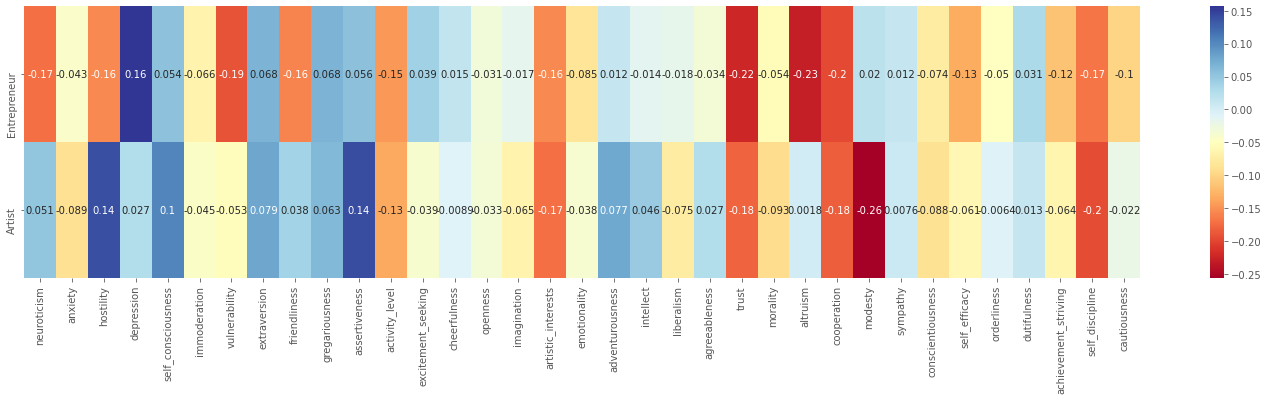

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,5))
sns.heatmap(overall_personality, ax=ax, annot=True, cmap='RdYlBu')

Since these values varies differently, to truely understand how similar entrepreneurs and artists are we should plot the distribution of the their personality types

In [49]:
entrepreneur_personality['occupation'] = 'entrepreneur'
artist_personality['occupation'] = 'artist'
entrepreneur_artist_personality = pd.concat([entrepreneur_personality, artist_personality]).reset_index()

/home/ubuntu/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


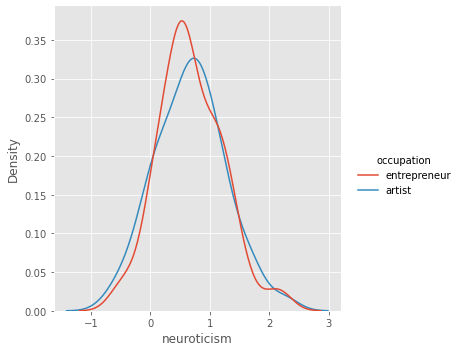

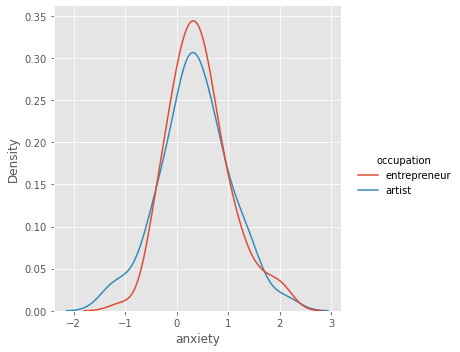

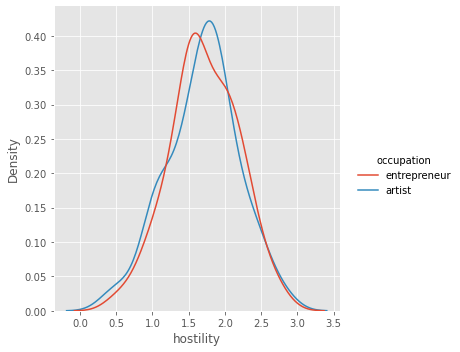

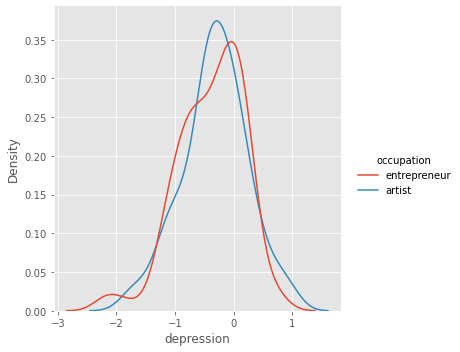

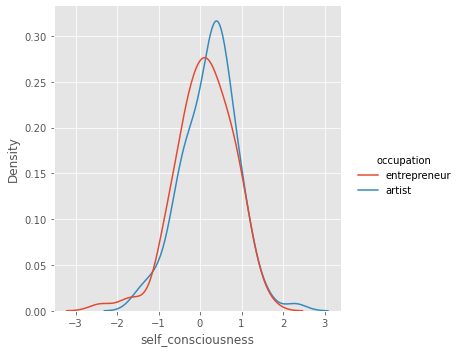

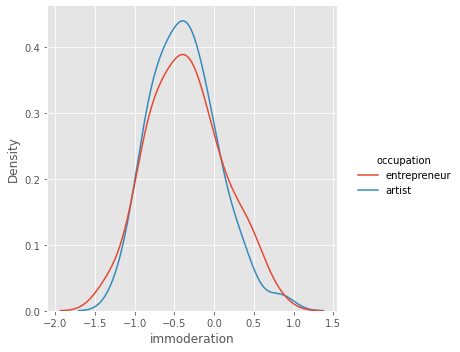

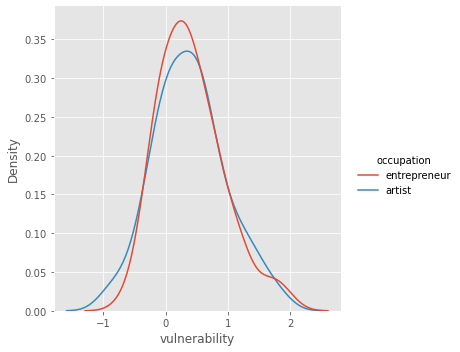

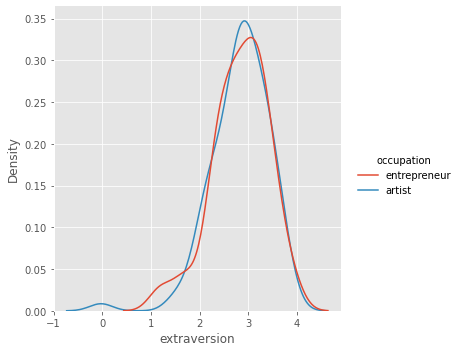

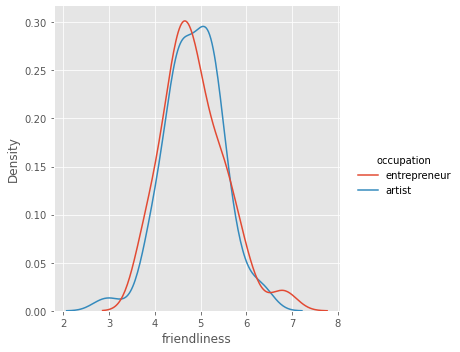

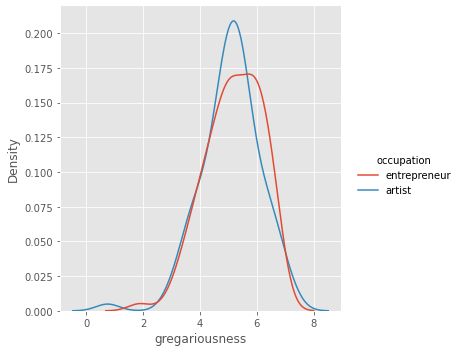

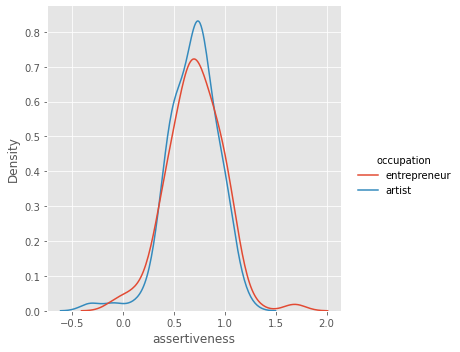

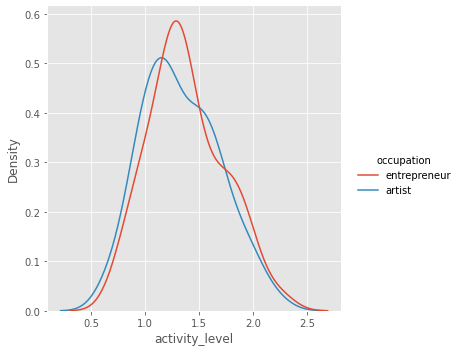

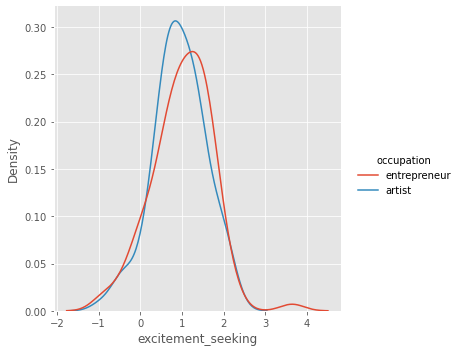

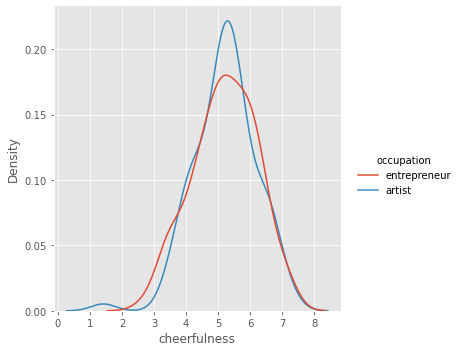

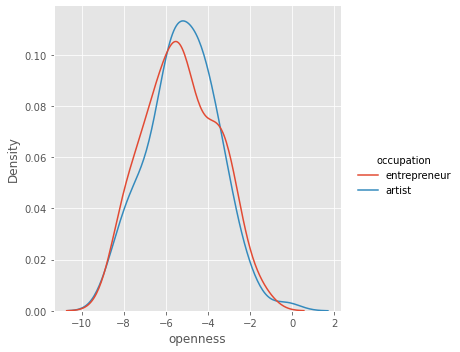

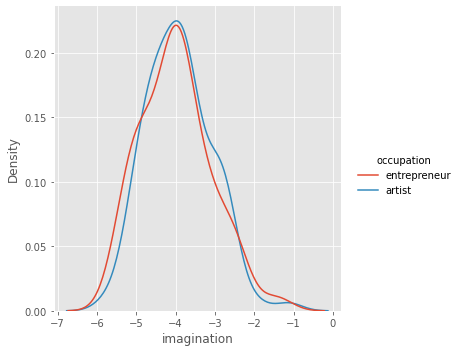

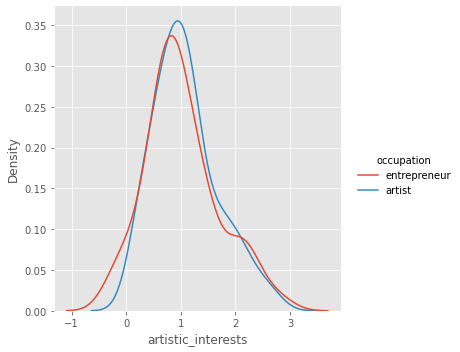

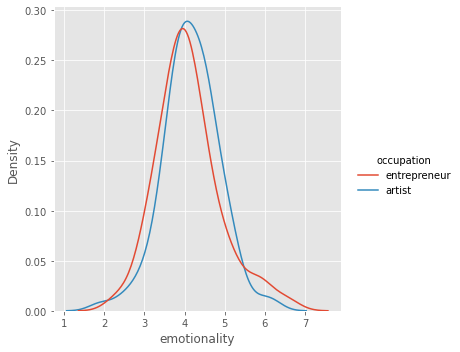

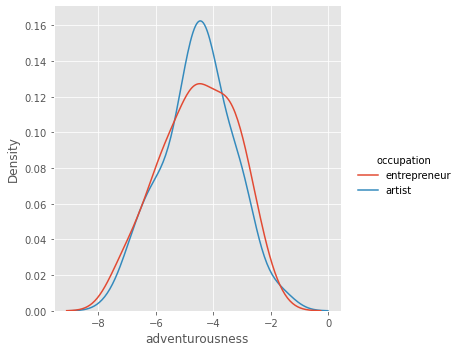

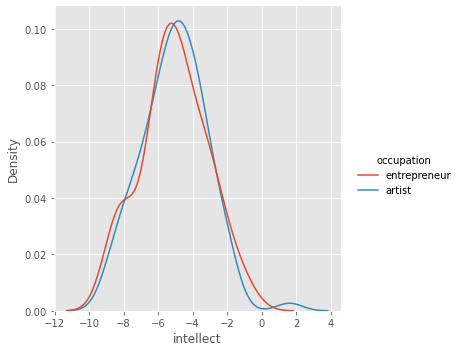

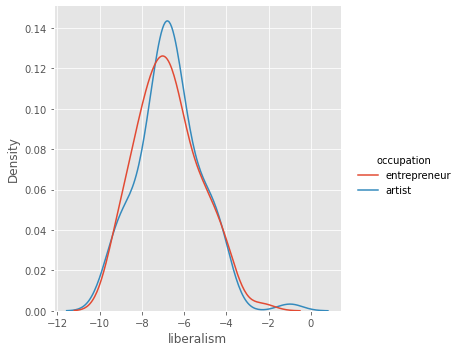

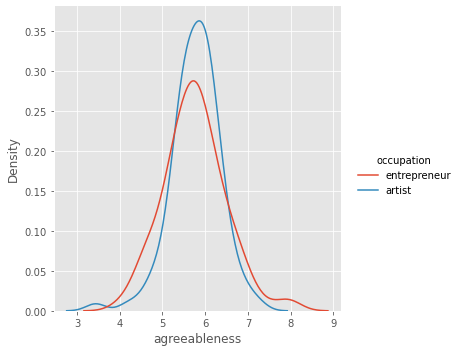

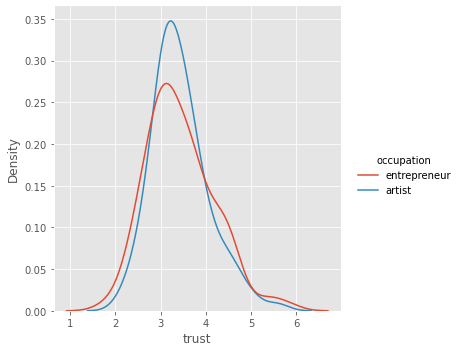

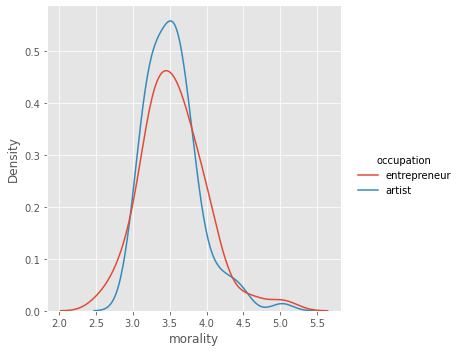

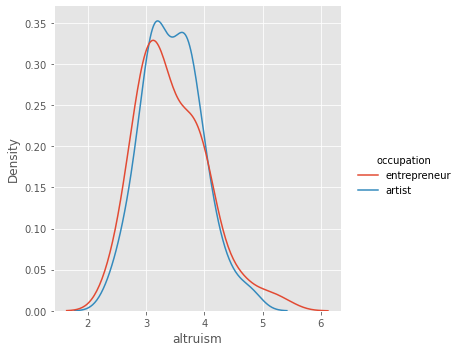

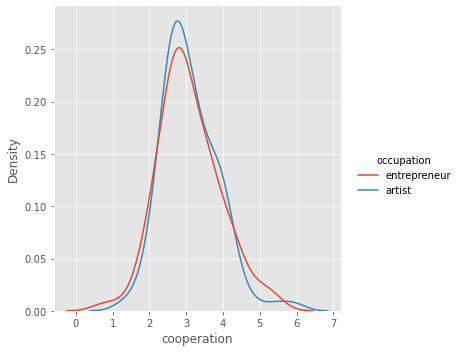

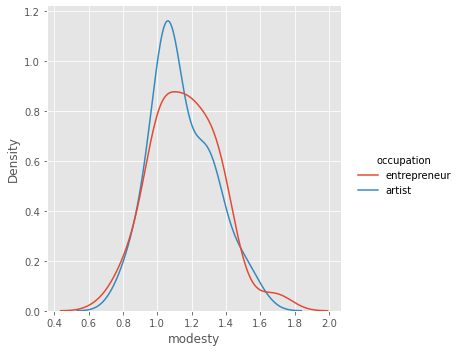

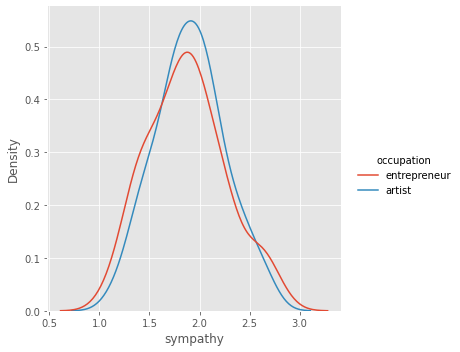

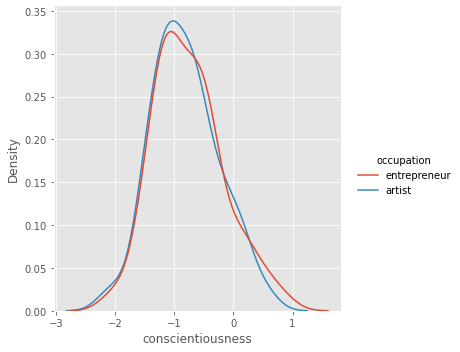

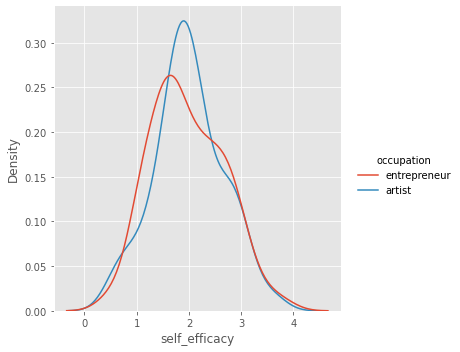

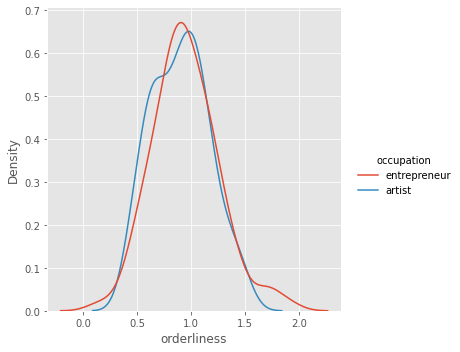

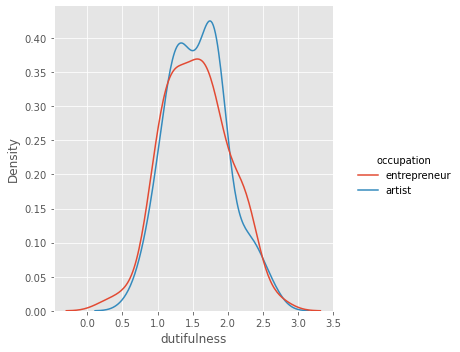

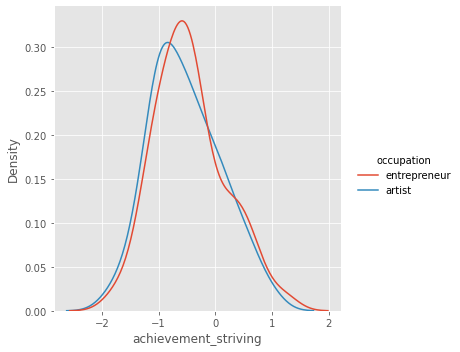

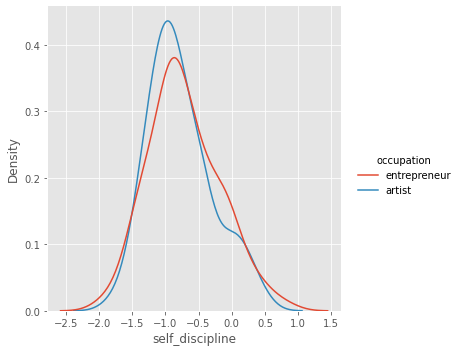

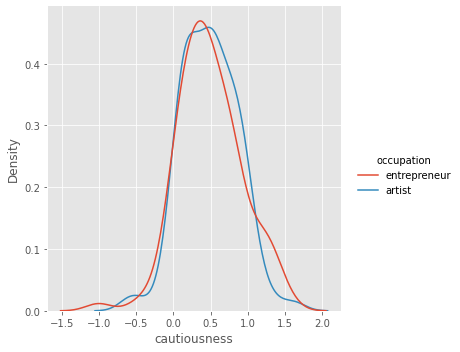

In [51]:
for i, attr in enumerate(PERSONALITY_ATTRS):
    sns.displot(entrepreneur_artist_personality, x=attr, hue='occupation', kind='kde')

In [37]:
from wordcloud import WordCloud

def plot_wordcloud(df):
    df_grouped = df.groupby('profession').agg({'quotations': lambda q: ' '.join(q)})
    quotes = ' '.join(df_grouped['quotations'])
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(quotes)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [39]:
entrepreneur_df['profession'] = 'entrepreneur'
artist_df['profession'] = 'artist'

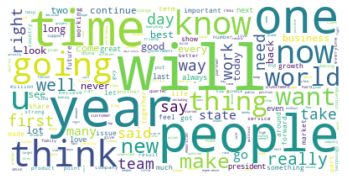

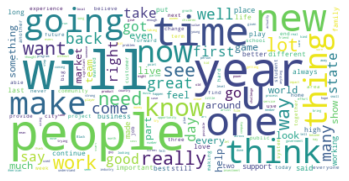

In [40]:
plot_wordcloud(entrepreneur_df)
plot_wordcloud(artist_df)

Kmeans clustering of entrepreneurs and artists

In [68]:
entrepreneur_personality['label'] = 'entrepreneur'
artist_personality['label'] = 'artist'
personality_combined = entrepreneur_personality.append(artist_personality)

In [69]:
personality_combined


,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,modesty,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness,label
0,1.008680,0.087084,2.008303,0.251061,0.883197,-0.291348,-0.329182,2.407586,3.752901,3.221153,...,1.109161,2.037928,-1.393528,1.738749,0.155109,0.897160,-1.033399,-1.492122,0.113124,entrepreneur
1,0.360221,-0.382193,1.500618,-0.974318,1.056977,-0.851517,-0.182155,1.198706,3.772758,2.933321,...,1.139922,2.129934,-0.330258,2.725102,0.821079,1.790545,0.384571,-0.799962,1.176163,entrepreneur
2,0.786874,0.281190,1.910822,0.141887,-0.118042,-0.157168,0.194891,3.193415,4.317880,4.919607,...,0.839953,1.688469,-1.572568,1.384246,0.546803,0.877750,-1.280599,-1.453492,0.065407,entrepreneur
3,0.476494,0.459964,1.290948,-0.683077,-0.898962,-0.414741,0.590268,3.721360,5.935456,6.719213,...,0.979392,1.921789,-0.639642,2.196208,1.026333,1.609732,-0.422826,-0.413381,0.256243,entrepreneur
4,1.514589,1.606463,2.352073,0.218802,-0.082994,0.520264,1.223142,3.565066,4.741136,6.466315,...,1.092475,1.489751,-1.190492,1.358884,1.402951,1.028978,-1.328036,-0.569406,-0.271149,entrepreneur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.714562,0.097159,1.588372,-0.270883,0.886584,-0.691182,0.453898,2.150190,4.464814,4.257877,...,0.928157,1.986762,-1.020593,2.105288,0.740574,1.738174,-0.061082,-1.106913,0.596036,artist
96,1.134508,0.535849,2.126600,0.142567,1.337476,-0.209294,0.559798,2.552945,3.825576,4.099789,...,1.153035,2.195135,-1.094065,1.843124,0.978687,1.284832,-0.794547,-1.398403,0.458955,artist
97,0.490624,0.192451,1.546072,-0.488199,0.189541,-0.354914,0.308681,2.702473,5.032412,4.780634,...,1.324119,2.105318,-0.581717,2.145328,1.128516,1.857662,-0.435742,-0.411009,0.419091,artist
98,1.365016,1.424351,2.188272,0.341522,1.136117,-0.037541,1.374654,3.060154,4.490237,6.063366,...,1.293084,1.453956,-1.079113,1.248866,1.176934,1.514676,-0.391975,-0.957420,0.199483,artist
